In [1]:
print('Hello Word!')

Hello Word!


In [2]:
import os
import tarfile
from six.moves import urllib

In [3]:
DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml/master'
HOUSING_PATH = os.path.join('datasets', 'housing')
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

In [4]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
        tgz_path = os.path.join(housing_path, 'housing.tgz')
        urllib.request.urlretrieve(housing_url, tgz_path)
        housing_tgz = tarfile.open(tgz_path)
        housing_tgz.extractall(path=housing_path)
        housing_tgz.close()

In [5]:
fetch_housing_data()

In [6]:
import pandas as pd

In [7]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [8]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


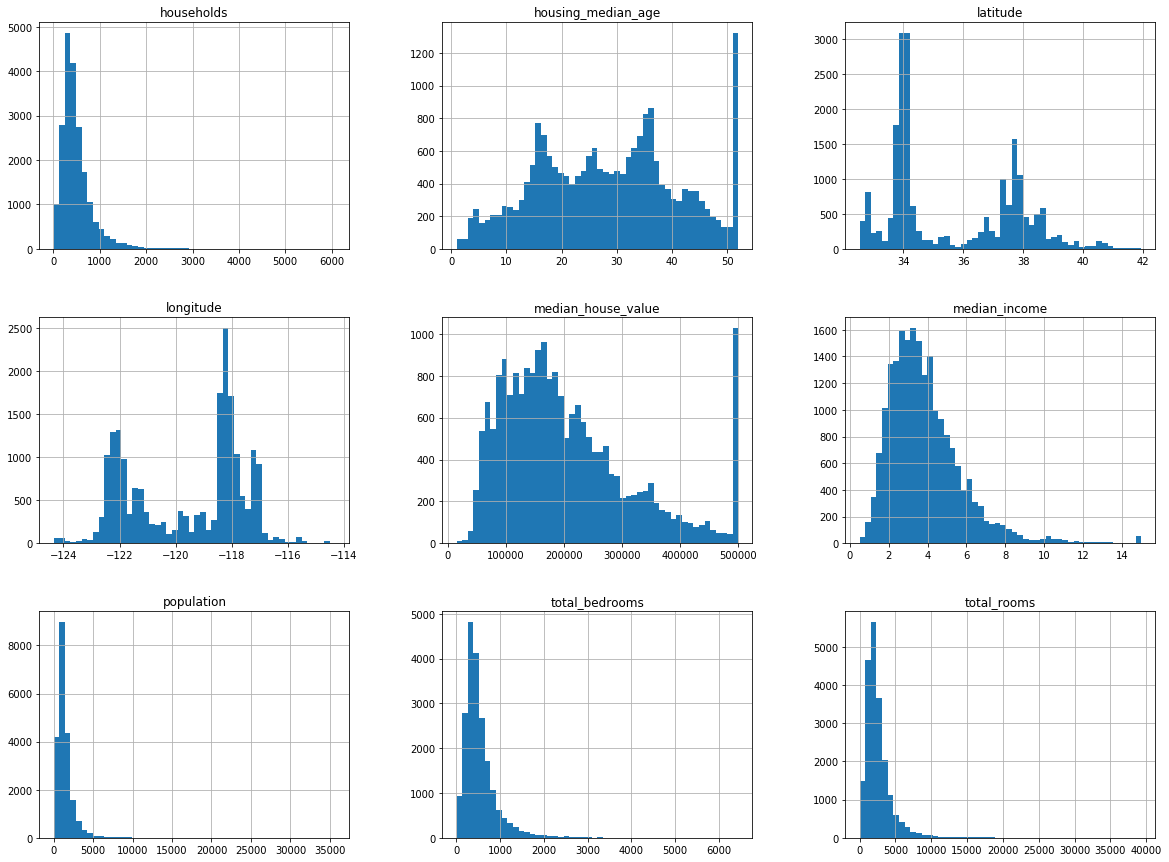

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [13]:
import numpy as np

In [14]:
np.random.seed(42)

In [15]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [16]:
import hashlib

In [17]:
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [18]:
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [19]:
housing_with_id = housing.reset_index() # adiciona uma columa 'index'
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'index')

In [20]:
housing_with_id['id'] = housing['longitude'] * 1000 + housing['latitude']
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, 'id')

In [21]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-122222.15
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,-122222.15
13,13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY,-122222.16


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [24]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

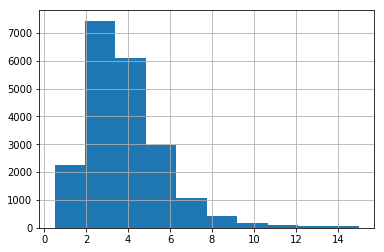

In [25]:
housing['median_income'].hist()

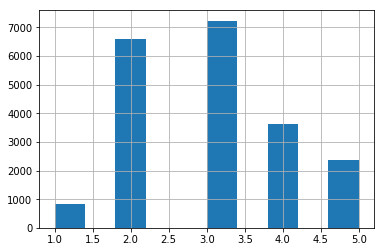

In [26]:
housing['income_cat'].hist()

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit

In [28]:
split = StratifiedShuffleSplit(n_splits=21, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [29]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [30]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

In [31]:
housing = strat_train_set.copy()

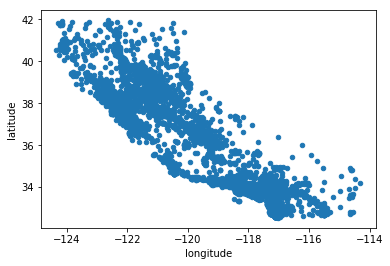

In [32]:
housing.plot(kind='scatter', x='longitude', y='latitude')

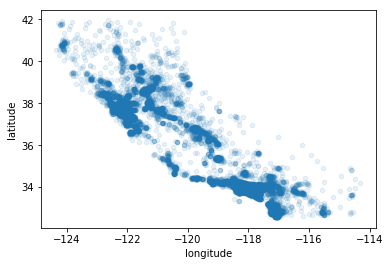

In [33]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

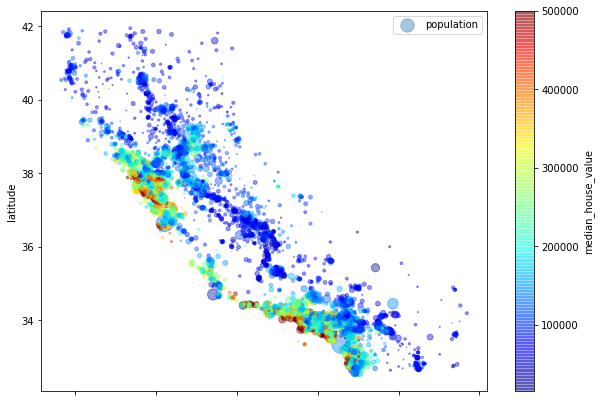

In [34]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
            s=housing['population']/100, label='population', figsize=(10,7),
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

In [35]:
# Correlações

corr_matrix = housing.corr()

In [38]:
corr_matrix['median_house_value'].sort_values(ascending=False) # Quanto mais proximo de 1 mais correlacionado esta.
# em 0 não existe correlação, e em -1 há uma correlação negativa do mesmo.

median_house_value    1.000000
median_income         0.687395
total_rooms           0.131262
housing_median_age    0.104319
households            0.064080
total_bedrooms        0.047446
population           -0.027391
longitude            -0.043549
latitude             -0.147135
Name: median_house_value, dtype: float64

In [41]:
from pandas.plotting import scatter_matrix

In [42]:
attribute = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002438E2902E8>,
      dtype=object)

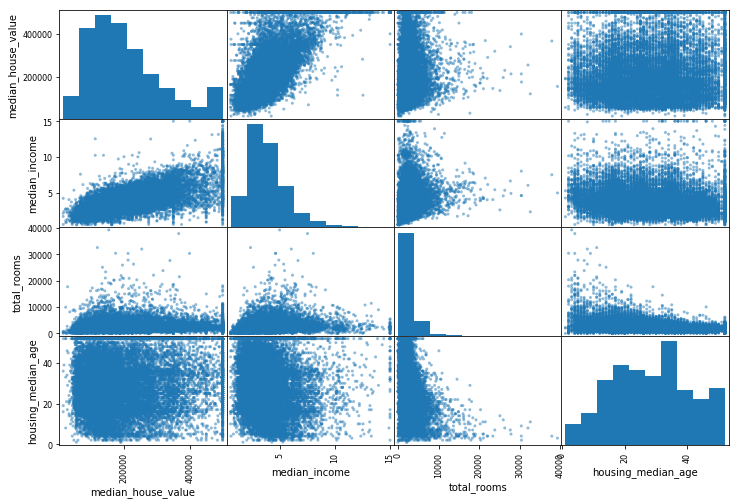

In [44]:
scatter_matrix(housing[attribute], figsize=(12, 8))

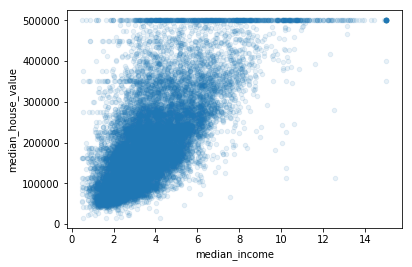

In [47]:
# atributo para prever o valor médio da habitação.
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

### Experimentando com Combinaçoes de Atributo

In [48]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household']=housing['population']/housing['households']

In [50]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False) # Exploração dos dados, torna tudo mais simples.

median_house_value          1.000000
median_income               0.687395
rooms_per_household         0.143741
total_rooms                 0.131262
housing_median_age          0.104319
households                  0.064080
total_bedrooms              0.047446
population_per_household   -0.020684
population                 -0.027391
longitude                  -0.043549
latitude                   -0.147135
bedrooms_per_room          -0.255042
Name: median_house_value, dtype: float64

### Preparando os Dados para Algoritimos do Aprendizado de Máquina

In [52]:
# revisando os dados limpos, separando previsores e rótulos.

housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [58]:
# Limpando dados.
# bairros
# atributos
# definição de valores (zero, a média, intermediaria... etc.)

housing.dropna(subset=['total_bedrooms']).head()  # opção 1
#housing.drop('total_bedrooms', axis=1)           # opção 2
#median = housing['total_bedrooms'].median()      #opção 3
#housing['total_bedrooms'].fillna(median, implace=True)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
11034,-117.82,33.78,25.0,4977.0,645.0,2061.0,646.0,6.5800,<1H OCEAN
8720,-118.35,33.83,36.0,1102.0,193.0,522.0,172.0,6.1187,<1H OCEAN
11331,-117.94,33.75,30.0,5268.0,1093.0,4480.0,1050.0,4.0150,<1H OCEAN
14787,-117.13,32.58,27.0,2511.0,615.0,1427.0,576.0,3.1645,NEAR OCEAN
8559,-118.41,33.92,32.0,2590.0,607.0,1132.0,555.0,4.2333,<1H OCEAN


In [59]:
housing.drop('total_bedrooms', axis=1).head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
11034,-117.82,33.78,25.0,4977.0,2061.0,646.0,6.5800,<1H OCEAN
8720,-118.35,33.83,36.0,1102.0,522.0,172.0,6.1187,<1H OCEAN
11331,-117.94,33.75,30.0,5268.0,4480.0,1050.0,4.0150,<1H OCEAN
14787,-117.13,32.58,27.0,2511.0,1427.0,576.0,3.1645,NEAR OCEAN
8559,-118.41,33.92,32.0,2590.0,1132.0,555.0,4.2333,<1H OCEAN


In [68]:
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median, inplace=True)

In [56]:
from sklearn.preprocessing import Imputer


In [57]:
imputer = Imputer(strategy='median')

C:\Users\alber\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [69]:
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [70]:
imputer.statistics_

array([-118.51 ,   34.26 ,   29.   , 2127.   ,  434.   , 1168.   ,
        409.   ,    3.533])

In [71]:
housing_num.median().values

array([-118.51 ,   34.26 ,   29.   , 2127.   ,  434.   , 1168.   ,
        409.   ,    3.533])

In [72]:
X = imputer.transform(housing_num)

In [74]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)